<a href="https://colab.research.google.com/github/lucaspn017/lucaspn017/blob/main/An%C3%A1lise_preditiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuração do Ambiente

In [6]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Configuração de estilo
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Análise Exploratória dos Dados (EDA)


In [10]:
# Carregar os dados
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

# Visualizar as primeiras linhas
print(train_df.head())

# Informações sobre o dataset
print(train_df.info())

# Estatísticas descritivas
print(train_df.describe())

# Verificar valores nulos
print(train_df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

# Visualizações dos Dados

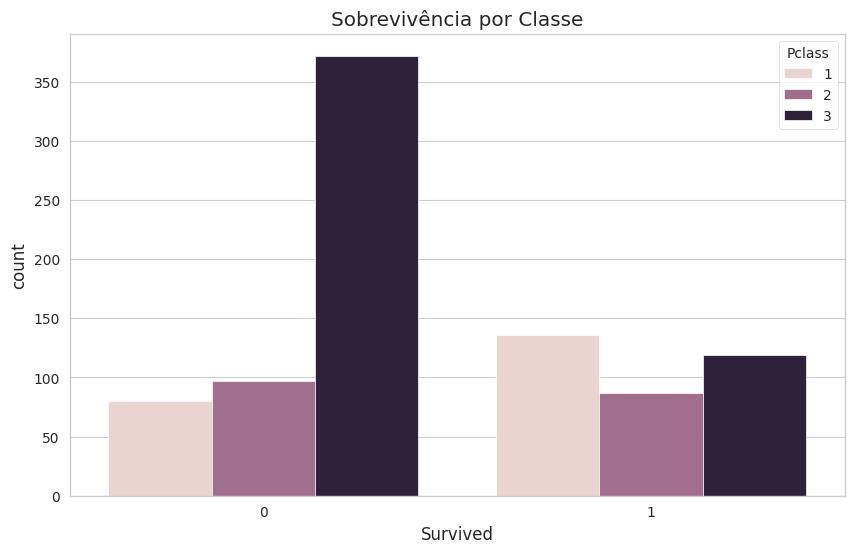

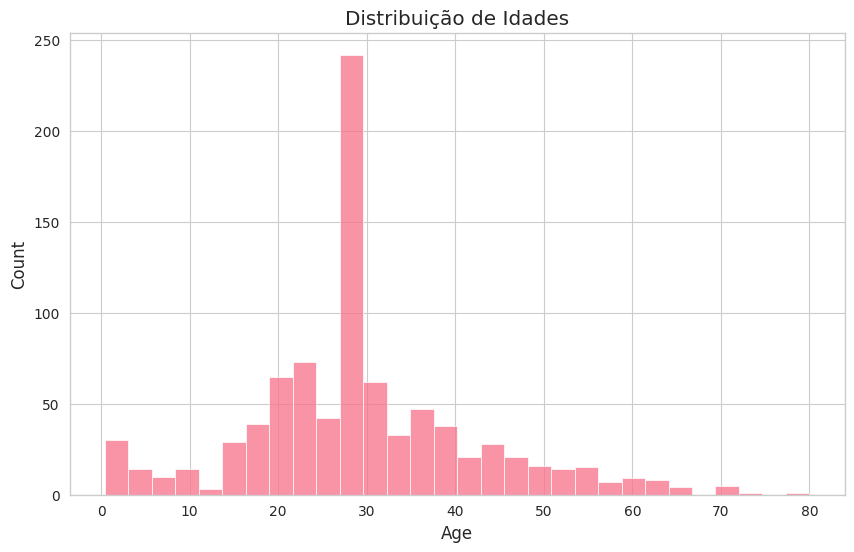

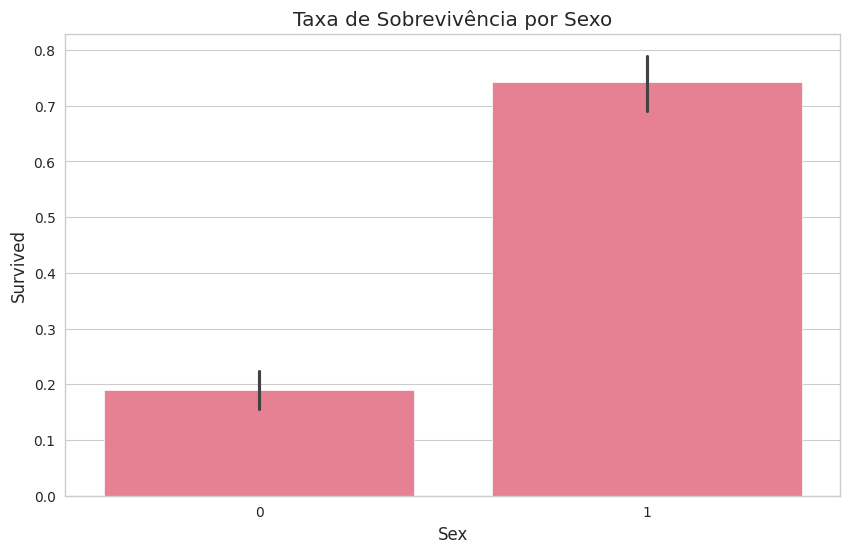

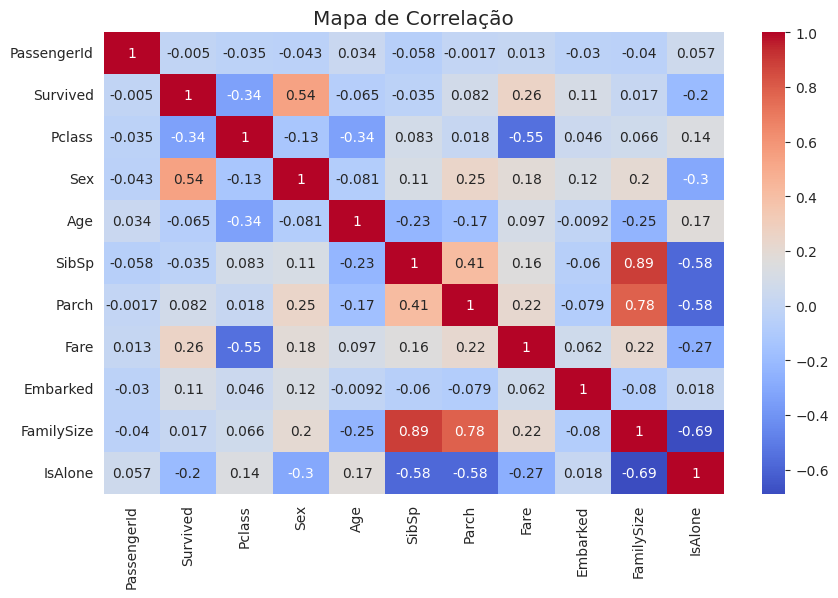

In [15]:
# Sobrevivência por classe
sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title('Sobrevivência por Classe')
plt.show()

# Distribuição de idades
sns.histplot(train_df['Age'].dropna(), bins=30, kde=False)
plt.title('Distribuição de Idades')
plt.show()

# Sobrevivência por sexo
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Taxa de Sobrevivência por Sexo')
plt.show()

# Correlação entre variáveis
corr = train_df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação')
plt.show()

# Pré-processamento dos Dados

In [12]:
# Preencher valores faltantes
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

# Converter variáveis categóricas
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Criar novas features
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['IsAlone'] = train_df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

# Selecionar features relevantes
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']
X = train_df[features]
y = train_df['Survived']

# Modelagem Preditiva


In [13]:
# Dividir os dados
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_val)

# Avaliar o modelo
print(f'Acurácia: {accuracy_score(y_val, y_pred)}')
print('\nMatriz de Confusão:')
print(confusion_matrix(y_val, y_pred))
print('\nRelatório de Classificação:')
print(classification_report(y_val, y_pred))

Acurácia: 0.8212290502793296

Matriz de Confusão:
[[90 15]
 [17 57]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



 # Interpretação dos Resultados

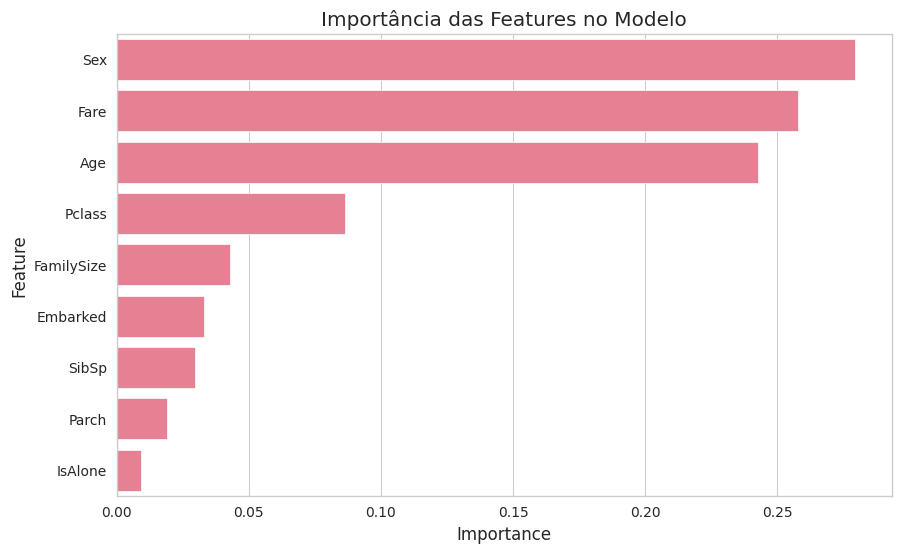

In [14]:
# Importância das features
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importância das Features no Modelo')
plt.show()